#                         Project 3 Decision Tree Classifier for Wines

In [4]:
!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [53]:
#Import the neccessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from __future__ import print_function
import os
data_path = ['data']
from io import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.metrics import classification_report

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [54]:
# Load the wine dataset
data = pd.read_csv("C:\\Users\\n\\Downloads\\wines.csv")

In [55]:
data.head()

,Type,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
1,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
2,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020
3,1,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
4,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990


In [56]:
data.tail()

,Type,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
25,3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725
26,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855
27,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750
28,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
29,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660


In [57]:
data.describe()

,Type,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.000000,12.989000,2.255000,2.327667,19.283333,97.533333,2.108333,1.757000,0.384333,1.502333,5.103333,0.983333,2.439333,762.866667
std,0.830455,0.652366,1.184558,0.369078,3.507340,13.753328,0.495484,0.904754,0.120192,0.543702,2.408344,0.261420,0.746167,251.083409
min,1.000000,11.030000,0.900000,1.360000,10.600000,78.000000,1.150000,0.470000,0.240000,0.420000,1.900000,0.570000,1.270000,372.000000
25%,1.000000,12.470000,1.502500,2.152500,16.850000,88.000000,1.672500,0.795000,0.280000,1.192500,3.725000,0.742500,1.820000,565.000000
50%,2.000000,13.060000,1.820000,2.365000,19.250000,98.000000,2.055000,1.925000,0.360000,1.460000,4.425000,1.065000,2.395000,737.500000
75%,3.000000,13.467500,3.092500,2.547500,21.875000,103.500000,2.457500,2.590000,0.492500,1.682500,5.835000,1.120000,2.870000,956.250000
max,3.000000,14.340000,5.190000,3.220000,25.000000,136.000000,3.000000,3.230000,0.610000,2.760000,13.000000,1.710000,4.000000,1285.000000


In [58]:
data.dtypes

Type                 int64
Alcohol            float64
MalicAcid          float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoid       float64
Proanthocyanins    float64
ColorIntensity     float64
Hue                float64
DilutedWines       float64
Proline              int64
dtype: object

# Visualization of the dataset

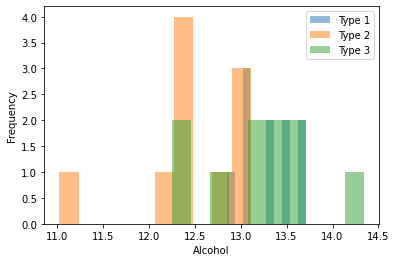

In [70]:
# Histogram of Alcohol content for each wine type
for i in range(1,4):
    plt.hist(data[data['Type']==i]['Alcohol'], bins=10, alpha=0.5, label='Type '+str(i))
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.legend()
plt.show()


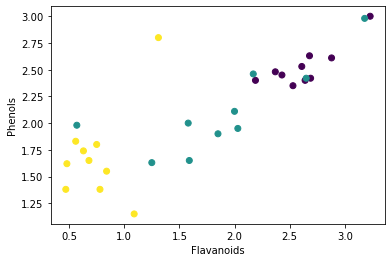

In [71]:
# Scatter plot of Flavanoids vs. Phenols
plt.scatter(data['Flavanoids'], data['Phenols'], c=data['Type'])
plt.xlabel('Flavanoids')
plt.ylabel('Phenols')
plt.show()


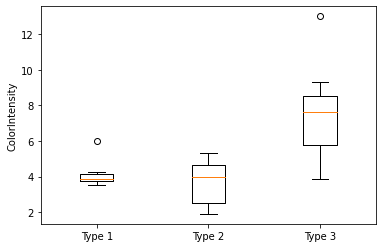

In [72]:

# Box plot of ColorIntensity for each wine type
plt.boxplot([data[data['Type']==i]['ColorIntensity'] for i in range(1,4)])
plt.xticks([1, 2, 3], ['Type 1', 'Type 2', 'Type 3'])
plt.ylabel('ColorIntensity')
plt.show()

# Train and Test splitting of data 

In [73]:
# Split the data into features (X) and target variable (y)
X = data.drop('Type', axis=1)
y = data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [74]:
y_train.value_counts(normalize=True).sort_index()

1    0.35
2    0.35
3    0.30
Name: Type, dtype: float64

In [75]:
y_test.value_counts(normalize=True).sort_index()

1    0.3
2    0.3
3    0.4
Name: Type, dtype: float64

In [76]:
# Fit a decision tree on the training data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [77]:
# Test the model on the remaining 50% of the data and generate a classification report
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



#  Visualize the decision tree

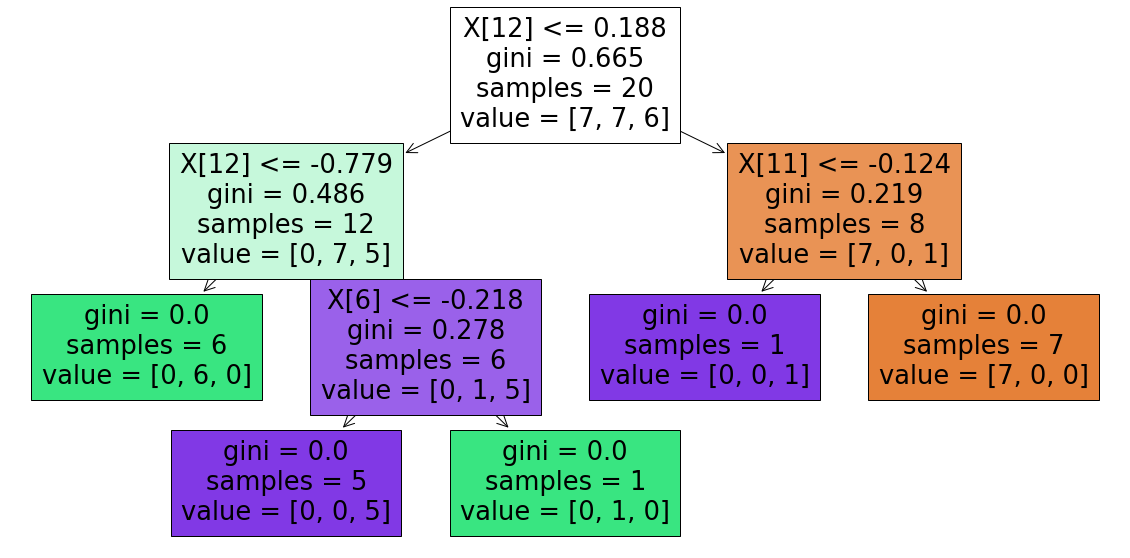

In [78]:
# To inspect the model, we can visualize the decision tree using the 
  # plot_tree function from sklearn.tree. 
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()


# Evaluate the accuracy of the classifier

In [79]:

# Evaluate the accuracy of the classifier
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 0.8


In [68]:
#THE END